In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [3]:
data=pd.read_csv('dataset_for_ml_models.zip')
data.head()

,YYYY,YYYYMM,INCOME,HOMEOWN,AGE,INFL_HOMEAMT,INFL_INVAMT,REGION_Northeast,REGION_South,REGION_West,...,EHSGRD_NA,EHSGRD_No,EHSGRD_Yes,ECLGRD_NA,ECLGRD_No,ECLGRD_Yes,POLAFF_Democrat,"POLAFF_Independent, No Preference",POLAFF_NA,POLAFF_Republican
0,2006,200609,52000,1,52,386127.458739,166892.013889,0,0,1,...,0,0,1,0,0,1,1,0,0,0
1,2006,200609,150000,1,70,386127.458739,96283.854167,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,2006,200609,38000,1,60,386127.458739,437017.193297,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,2006,200609,175000,1,53,386127.458739,962838.541667,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4,2006,200609,24000,2,59,386127.458739,6420.207396,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [4]:
data['AGE']=scale(data['AGE'])
data['INFL_HOMEAMT']=scale(data['INFL_HOMEAMT'])
data['INFL_INVAMT']=scale(data['INFL_INVAMT'])
data['INCOME']=scale(data['INCOME'])
data['YYYY'] = LabelEncoder().fit_transform(data['YYYY'])
data.head()

,YYYY,YYYYMM,INCOME,HOMEOWN,AGE,INFL_HOMEAMT,INFL_INVAMT,REGION_Northeast,REGION_South,REGION_West,...,EHSGRD_NA,EHSGRD_No,EHSGRD_Yes,ECLGRD_NA,ECLGRD_No,ECLGRD_Yes,POLAFF_Democrat,"POLAFF_Independent, No Preference",POLAFF_NA,POLAFF_Republican
0,0,200609,-0.562350,1,0.007788,-3.488944e-15,-0.360122,0,0,1,...,0,0,1,0,0,1,1,0,0,0
1,0,200609,0.514108,1,1.077950,-3.488944e-15,-0.454185,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,0,200609,-0.716130,1,0.483415,-3.488944e-15,-0.000262,0,1,0,...,0,0,1,0,1,0,0,1,0,0
3,0,200609,0.788715,1,0.067241,-3.488944e-15,0.700235,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4,0,200609,-0.869910,2,0.423962,-3.488944e-15,-0.573901,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [5]:
train, test = train_test_split(data, test_size = 0.3, random_state= 1)

In [6]:
x_train=train.drop(['INCOME','YYYYMM'],axis=1)
y_train=train['INCOME']
x_test=test.drop(['INCOME','YYYYMM'],axis=1)
y_test=test['INCOME']

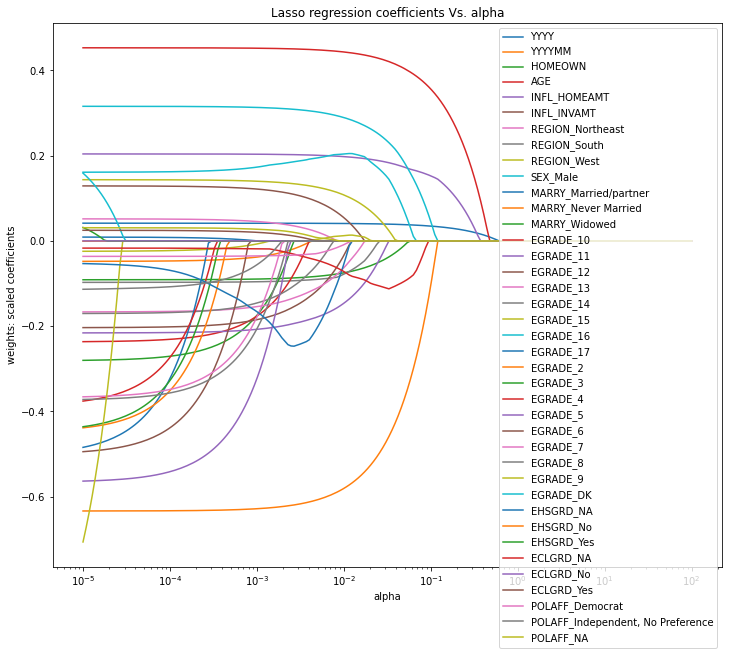

In [7]:
lambds=np.logspace(-5,2,200)
alpha_lasso =lambds
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i,tol=10-3,fit_intercept=True)
    lasso.fit(x_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(data.drop('INCOME',axis=1, inplace=False).columns)
plt.show()

From the graph, we choose the alpha value to be $10^{-2}$ to get the adequate number of features to do the machine learning algorithm.

In [12]:
from sklearn.metrics import mean_squared_error
lasso.set_params(alpha = 10**-2,tol=10-3,fit_intercept=True)
model_lasso = lasso.fit(x_train, y_train)
coef = pd.Series(model_lasso.coef_,index=x_train.columns)
print(coef[coef != 0].abs().sort_values(ascending = False))
y_pred = model_lasso.predict(x_test)
# 计算均方根误差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

HOMEOWN                              0.580454
INFL_HOMEAMT                         0.443390
MARRY_Married/partner                0.289477
EGRADE_17                            0.204015
INFL_INVAMT                          0.197915
EGRADE_12                            0.145995
SEX_Male                             0.107912
REGION_West                          0.077916
AGE                                  0.074752
ECLGRD_No                            0.071835
EGRADE_14                            0.062681
REGION_Northeast                     0.054578
EHSGRD_No                            0.053823
YYYY                                 0.041046
EGRADE_13                            0.033641
EGRADE_16                            0.012419
POLAFF_Independent, No Preference    0.008688
ECLGRD_Yes                           0.000293
dtype: float64
RMSE: 0.7576922855905254


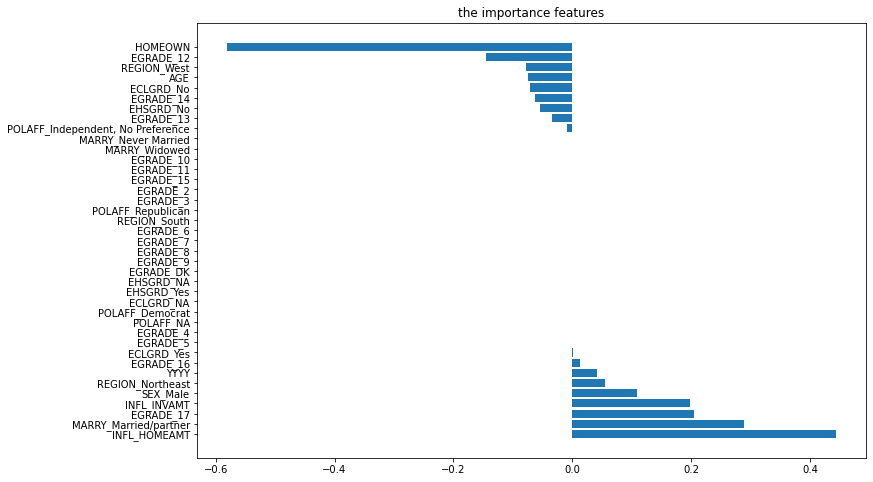

In [9]:
fea = x_train.columns
a = pd.DataFrame()
a['feature'] = fea
a['importance'] = coef.values
a = a.sort_values('importance',ascending = False)
plt.figure(figsize=(12,8))
plt.barh(a['feature'],a['importance'])
plt.title('the importance features')
plt.show()

All of the importance variable is shown in the figure.(The variable with 